In [10]:
!pip install nasdaq-data-link

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import nasdaqdatalink
import seaborn as sns

In [12]:
data_naturalgas = nasdaqdatalink.get("EIA/NG_RNGC1_D", start_date="2000-01-01", end_date="2022-03-31")
data_naturalgas.head()

,Value
Date,
2000-01-04,2.176
2000-01-05,2.168
2000-01-06,2.196
2000-01-07,2.173
2000-01-10,2.216


In [13]:
# Define the explanatory variables, moving averages for the past three and nine days

data_naturalgas['MA3'] = data_naturalgas['Value'].shift(1).rolling(window=3).mean()
data_naturalgas['MA9']= data_naturalgas['Value'].shift(1).rolling(window=9).mean()

In [14]:
# Droping all of the NaN values and storing it in X variable

data_naturalgas = data_naturalgas.dropna()

X = data_naturalgas[['MA3', 'MA9']]

X.head()

,MA3,MA9
Date,,
2000-01-18,2.272667,2.223000
2000-01-19,2.319000,2.246000
2000-01-20,2.374000,2.273667
2000-01-21,2.453000,2.314000
2000-01-24,2.487000,2.348667


In [15]:
# Initialize dependant variable, y

y = data_naturalgas['Value']

y.head()

Date
2000-01-18    2.383
2000-01-19    2.417
2000-01-20    2.559
2000-01-21    2.485
2000-01-24    2.528
Name: Value, dtype: float64

In [17]:
# 80% in to the training set and 20% in to the testing set
training = 0.8
t = int(training*len(data_naturalgas))

X_train = X[:t]
y_train = y[:t]

X_test = X[t:]
y_test = y[t:]

In [18]:
# Generating coefficients and constants for LR
model = LinearRegression().fit(X_train,y_train)

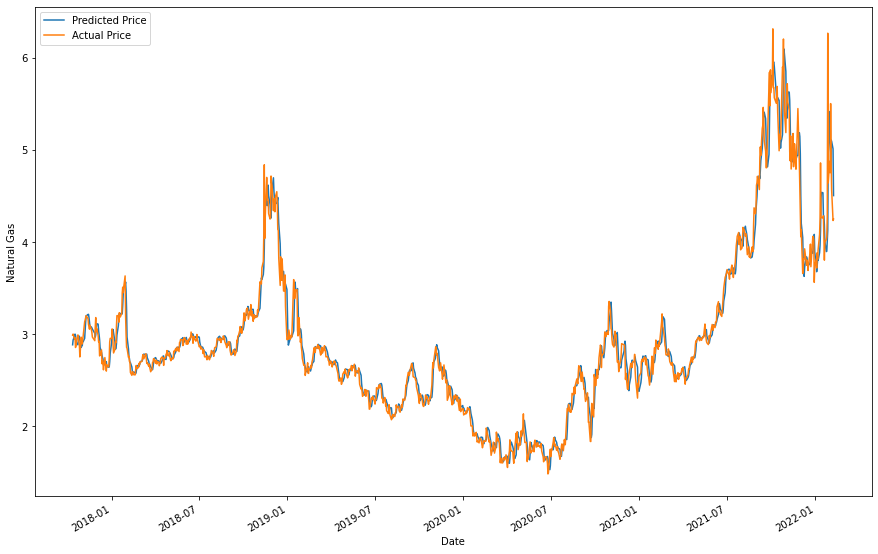

In [20]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(15,10))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Natural Gas")
plt.show()

In [23]:
# Accuracy of the model
R_squared_score = model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 96.79% accuracy.
